In [1]:
# Sprint6 決定木

# ライブラリのimport

#%%

import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#%%

# Decision tree (depth 1) scratch
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木のスクラッチ
    """
    def __init__(self, verbose=False):
        """コンストラクタ
        Parameters
        ----------
        verbose : 計算過程を表示するか否か
        """
        self.verbose = verbose
    
    def calc_gini(self,y):
        """ジニ不純度の計算
        Parameters
        ----------
        y : 目的変数
        """
        # クラスとその数を求める
        labels,counts = np.unique(y,return_counts=True)
        
        # sum部分の計算のため、_giniに加えていく
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
            
        # 最終的なジニ不純度の計算
        gini = 1 - _gini
        
        return gini
    
    def calc_gain(self,X,feature_index,y,threshold):
        """情報利得の計算
        Parameters
        ----------
        X：親ノードのラベルに該当する説明変数
        feature_index：どの説明変数を使用するか
        y：親ノードのラベル
        threshold：説明変数の閾値
        """
        # 左右ノードのラベル取得
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        
        # 情報利得算出に必要な左右ノード部分の計算
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self.calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self.calc_gini(labels_r)
        
        # 最終的な情報利得の計算
        gain = self.calc_gini(y) -gain_l -gain_r
        
        return gain
        
        
    def fit(self, X, y):
        """
        Train a decision tree classifier.
        Parameters
        ----------
        X : 説明変数
        y : 目的変数
        """
        # 情報利得の初期値
        self.gain = 0
        # 説明変数の数でループ
        for feature_index in range(X.shape[1]):
            # 該当説明変数の全値の重複をなくす
            self.thresholds = np.unique(X[:,feature_index])
            # 重複をなくした各値でループ
            for threshold in self.thresholds[1:]:
                # 情報利得の計算
                _gain = self.calc_gain(X,feature_index,y,threshold)
                # 情報利得が大きければ各値を更新
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    
                    # 更新仮定出力
                    if self.verbose:
                        print('feature',self.feature,
                              'threshold',self.threshold,
                              'gain',self.gain)
            
    def predict(self, X):
        """予測
        Parameters
        ----------
        X : 説明変数
        """
        # xの該当説明変数が閾値以上か以下かを判定し、ラベルを割り当てている
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction

In [2]:
# 問題1

# **例①**:クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500

# **例②**:クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667

#%%

clf = ScratchDecesionTreeClassifierDepth1(verbose = True)

#%%

# 例①
y = np.array([1]*15+[2]*15)
clf.calc_gini(y)

#%%

# 例②
y = np.array([1]*15+[2]*15+[3]*15)
clf.calc_gini(y)

array([0.66666667])

In [4]:
# 問題2

# 左ノードクラス1：サンプル数10

# 左ノードクラス2：サンプル数30

# 右ノードクラス1：サンプル数20

# 右ノードクラス2：サンプル数5

# → 情報利得0.143

#%%

X = np.array([[0]]*10+[[0]]*30+[[1]]*20+[[1]]*5)
feature_index = 0
y = np.array([[1]]*10+[[2]]*30+[[1]]*20+[[2]]*5)
threshold = 1

#%%

clf.calc_gain(X,feature_index,y,threshold)

array([0.14319527])

feature 0 threshold -3.5944 gain [0.01612903]
feature 0 threshold -3.1625 gain [0.03333333]
feature 0 threshold -3.1108 gain [0.05172414]
feature 0 threshold -2.9452 gain [0.07142857]
feature 1 threshold -2.5323 gain [0.09259259]
feature 1 threshold -1.8219 gain [0.09375]
feature 1 threshold 5.3524 gain [0.11835749]


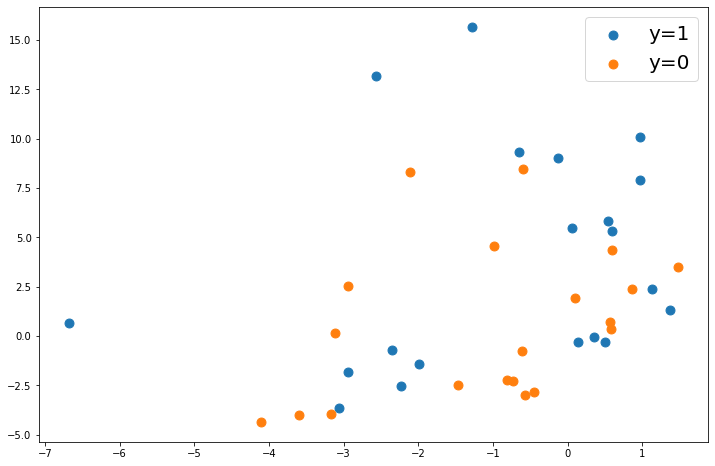

In [5]:
# 問題3

#%%

# サンプルデータ
X=np.array([[-0.44699,-2.8073],[-1.4621,-2.4586],[0.10645,1.9242],[-3.5944,-4.0112],[-0.9888,4.5718],[-3.1625,-3.9606],[0.56421,0.72888],[-0.60216,8.4636],[-0.61251,-0.75345],[-0.73535,-2.2718],[-0.80647,-2.2135],[0.86291,2.3946],[-3.1108,0.15394],[-2.9362,2.5462],[-0.57242,-2.9915],[1.4771,3.4896],[0.58619,0.37158],[0.6017,4.3439],[-2.1086,8.3428],[-4.1013,-4.353],[-1.9948,-1.3927],[0.35084,-0.031994],[0.96765,7.8929],[-1.281,15.6824],[0.96765,10.083],[1.3763,1.3347],[-2.234,-2.5323],[-2.9452,-1.8219],[0.14654,-0.28733],[0.5461,5.8245],[-0.65259,9.3444],[0.59912,5.3524],[0.50214,-0.31818],[-3.0603,-3.6461],[-6.6797,0.67661],[-2.353,-0.72261],[1.1319,2.4023],[-0.12243,9.0162],[-2.5677,13.1779],[0.057313,5.4681]])
y=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

#%%

# サンプルデータの可視化
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[y==1,0],X[y==1,1],s=80,label='y=1')
plt.scatter(X[y==0,0],X[y==0,1],s=80,label='y=0')
plt.legend();

#%%

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=None)

#%%

# 訓練
clf.fit(X_train,y_train)

In [6]:
# 問題4

#%%

# 予測
train_prediction = clf.predict(X_train)
test_prediction = clf.predict(X_test)

#%%

# 訓練データに対する評価
accuracy = accuracy_score(y_train, train_prediction)
precision = precision_score(y_train, train_prediction)
recall = recall_score(y_train, train_prediction)
f1 = f1_score(y_train, train_prediction)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

#%%

# テストデータに対する評価
accuracy = accuracy_score(y_test, test_prediction)
precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)
f1 = f1_score(y_test, test_prediction)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.71875
precision 0.8888888888888888
recall 0.5
f1 0.64
accuracy 0.5
precision 0.5
recall 0.25
f1 0.3333333333333333


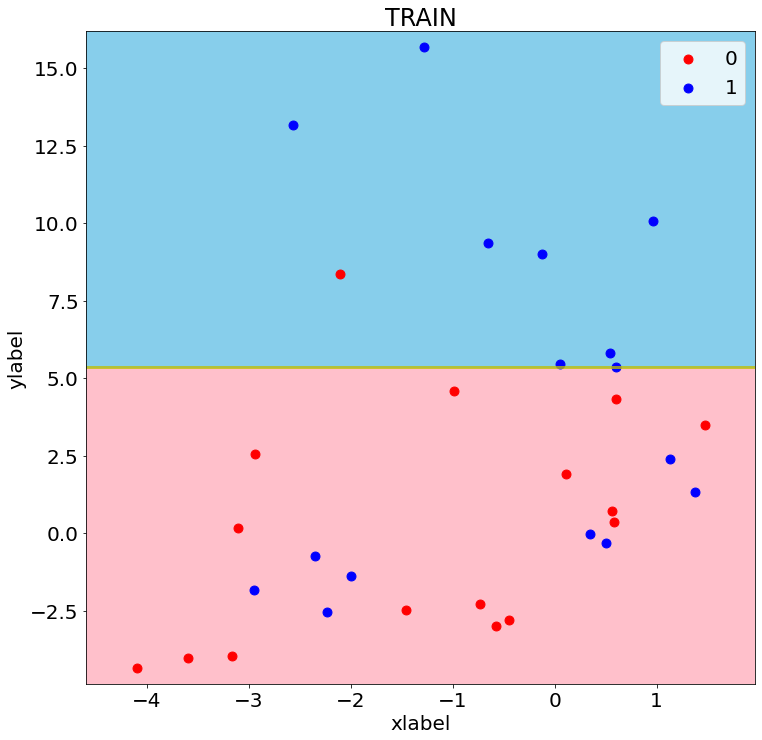

In [8]:
# 問題6

# Visualizing the decision area
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['versicolor', 'virginica']
                   ):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

#%%

# Results of Scratch Decision Tree Classification
fit,ax = plt.subplots(figsize=(12,12))
plt.rcParams["font.size"] = 20
decision_region(X_train,y_train,clf,target_names=['0', '1'],title='TRAIN')